# Pre-processing and visualization of the data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib
import gc
import matplotlib.pyplot as plt
import seaborn as sns

# Path to datasets
DATASET_DIRECTORY = ".\\Files\\"
datasets = os.listdir(DATASET_DIRECTORY)

# Load dataset
def load_dataset(dataset_name):
    df = pd.read_csv(DATASET_DIRECTORY + dataset_name)
    return df

### Pre-processing

In [4]:
# Detect NaN values
def detect_nan_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            print(column, df[column].isnull().sum())

# Preprocess dataset
for dataset_name in tqdm(datasets):
    if dataset_name.endswith(".csv"):
        # print(dataset_name)
        df = load_dataset(dataset_name)
        detect_nan_values(df)
        del df
        gc.collect()

100%|██████████| 169/169 [02:00<00:00,  1.40it/s]


#### Dictionnary for 8 classes

In [5]:
dict_7classes = {}
dict_7classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_7classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_7classes['DDoS-SYN_Flood'] = 'DDoS'
dict_7classes['DDoS-UDP_Flood'] = 'DDoS'
dict_7classes['DDoS-TCP_Flood'] = 'DDoS'
dict_7classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_7classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_7classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-SlowLoris'] = 'DDoS'
dict_7classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_7classes['DoS-UDP_Flood'] = 'DoS'
dict_7classes['DoS-SYN_Flood'] = 'DoS'
dict_7classes['DoS-TCP_Flood'] = 'DoS'
dict_7classes['DoS-HTTP_Flood'] = 'DoS'


dict_7classes['Mirai-greeth_flood'] = 'Mirai'
dict_7classes['Mirai-greip_flood'] = 'Mirai'
dict_7classes['Mirai-udpplain'] = 'Mirai'

dict_7classes['Recon-PingSweep'] = 'Recon'
dict_7classes['Recon-OSScan'] = 'Recon'
dict_7classes['Recon-PortScan'] = 'Recon'
dict_7classes['VulnerabilityScan'] = 'Recon'
dict_7classes['Recon-HostDiscovery'] = 'Recon'

dict_7classes['DNS_Spoofing'] = 'Spoofing'
dict_7classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_7classes['BenignTraffic'] = 'Benign'

dict_7classes['BrowserHijacking'] = 'Web'
dict_7classes['Backdoor_Malware'] = 'Web'
dict_7classes['XSS'] = 'Web'
dict_7classes['Uploading_Attack'] = 'Web'
dict_7classes['SqlInjection'] = 'Web'
dict_7classes['CommandInjection'] = 'Web'


dict_7classes['DictionaryBruteForce'] = 'BruteForce'

### Visualization

#### 1 - Attacks occurence (34 classes & 8 classes)

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


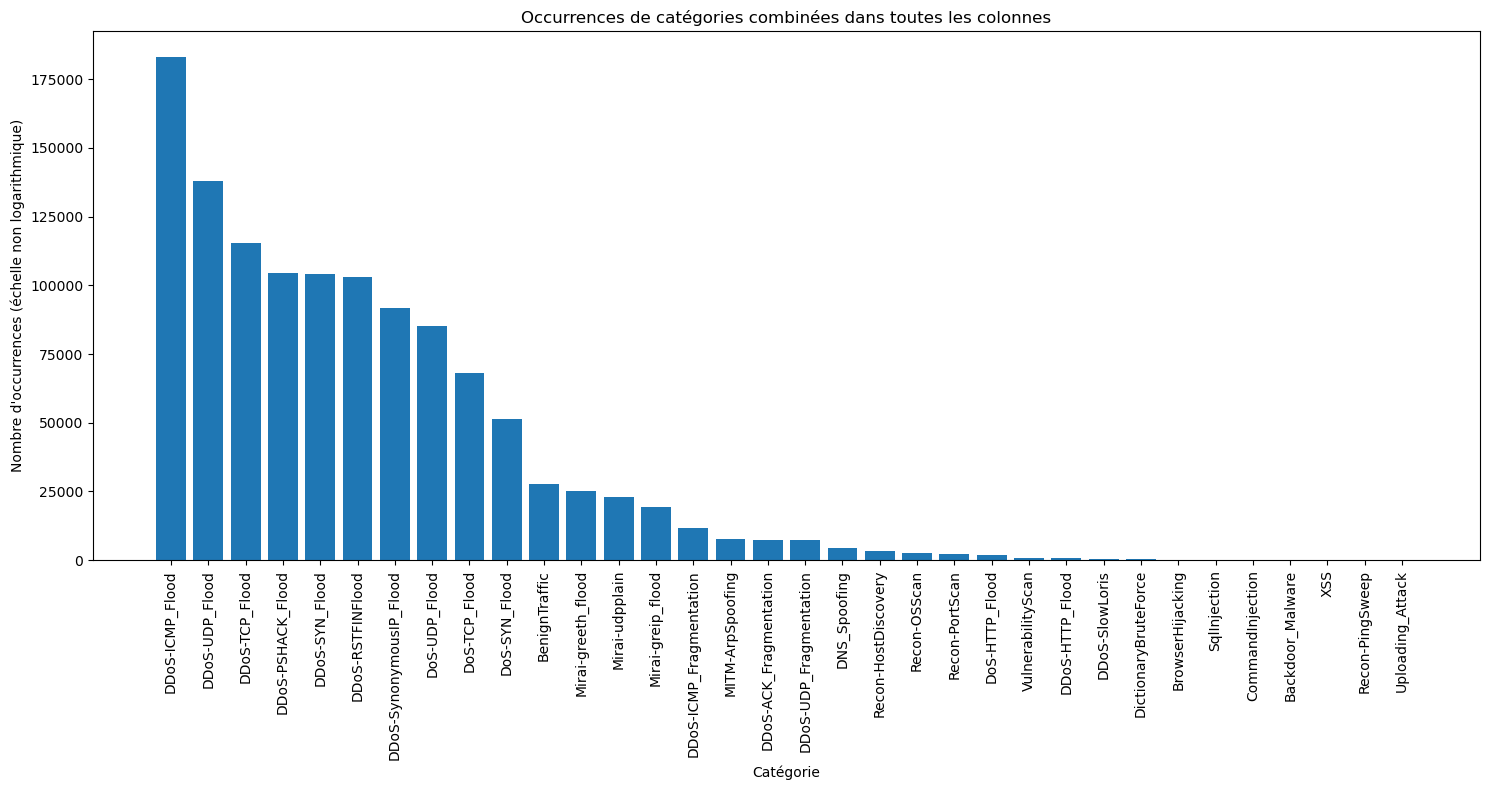

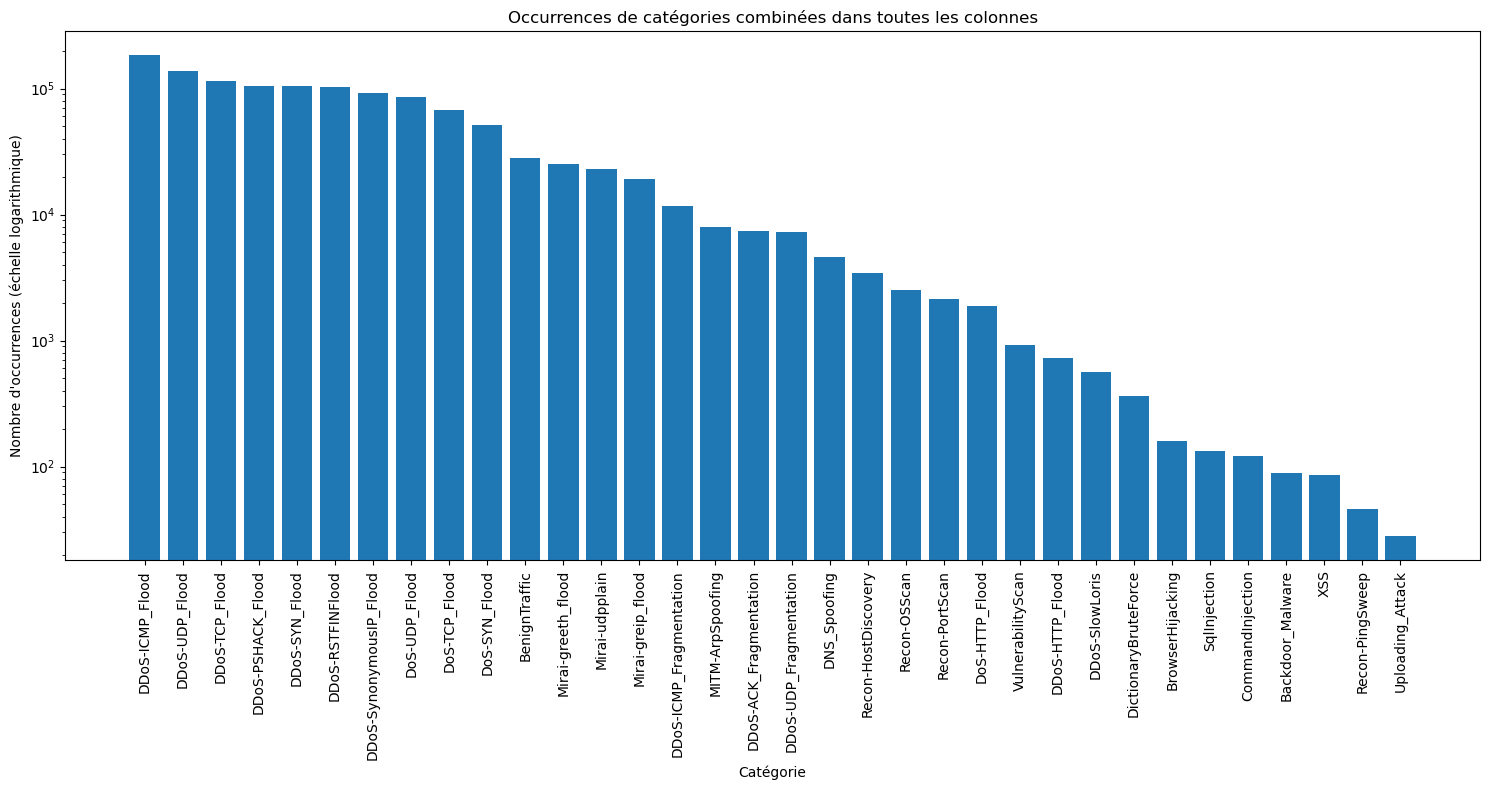

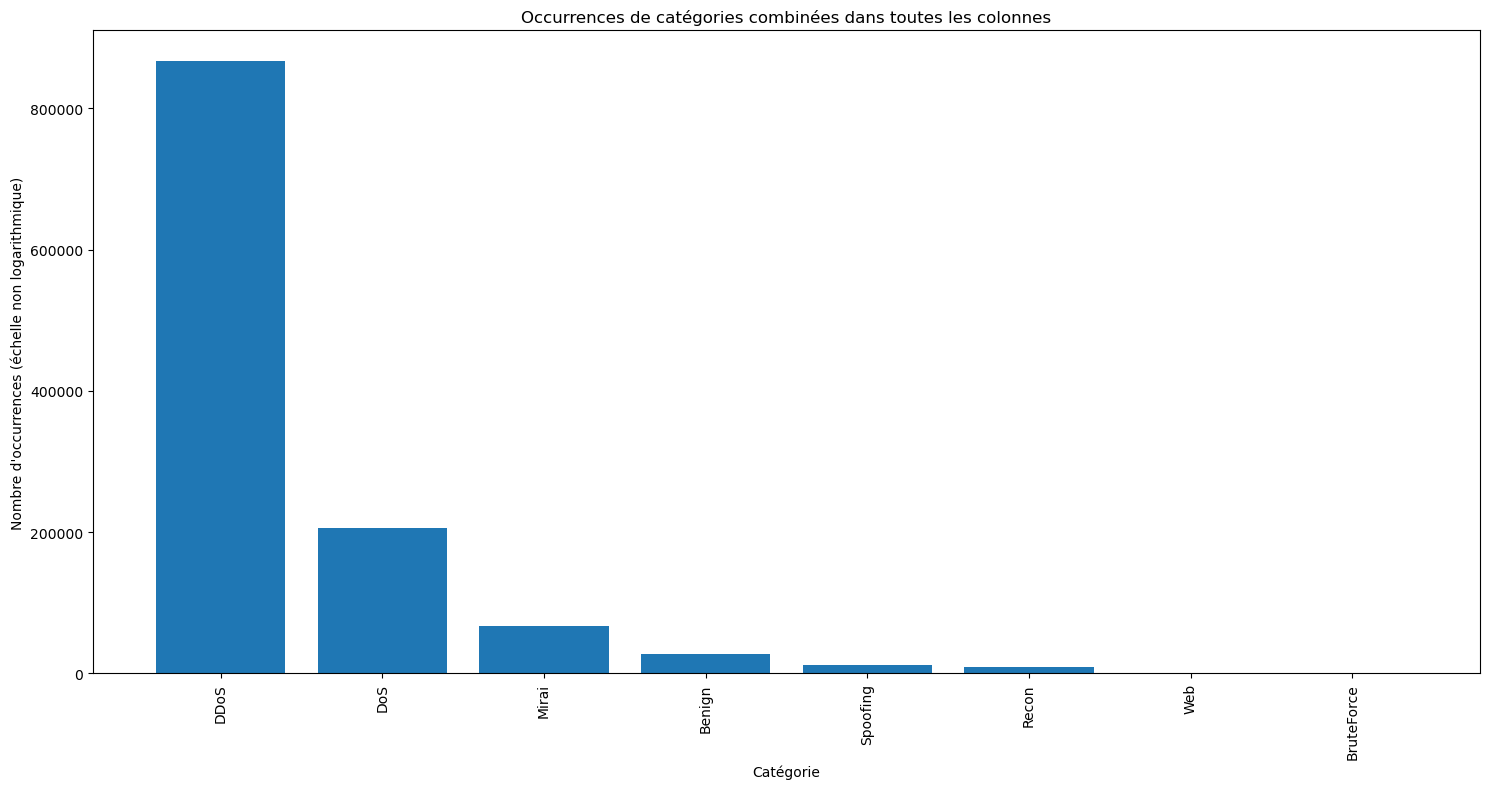

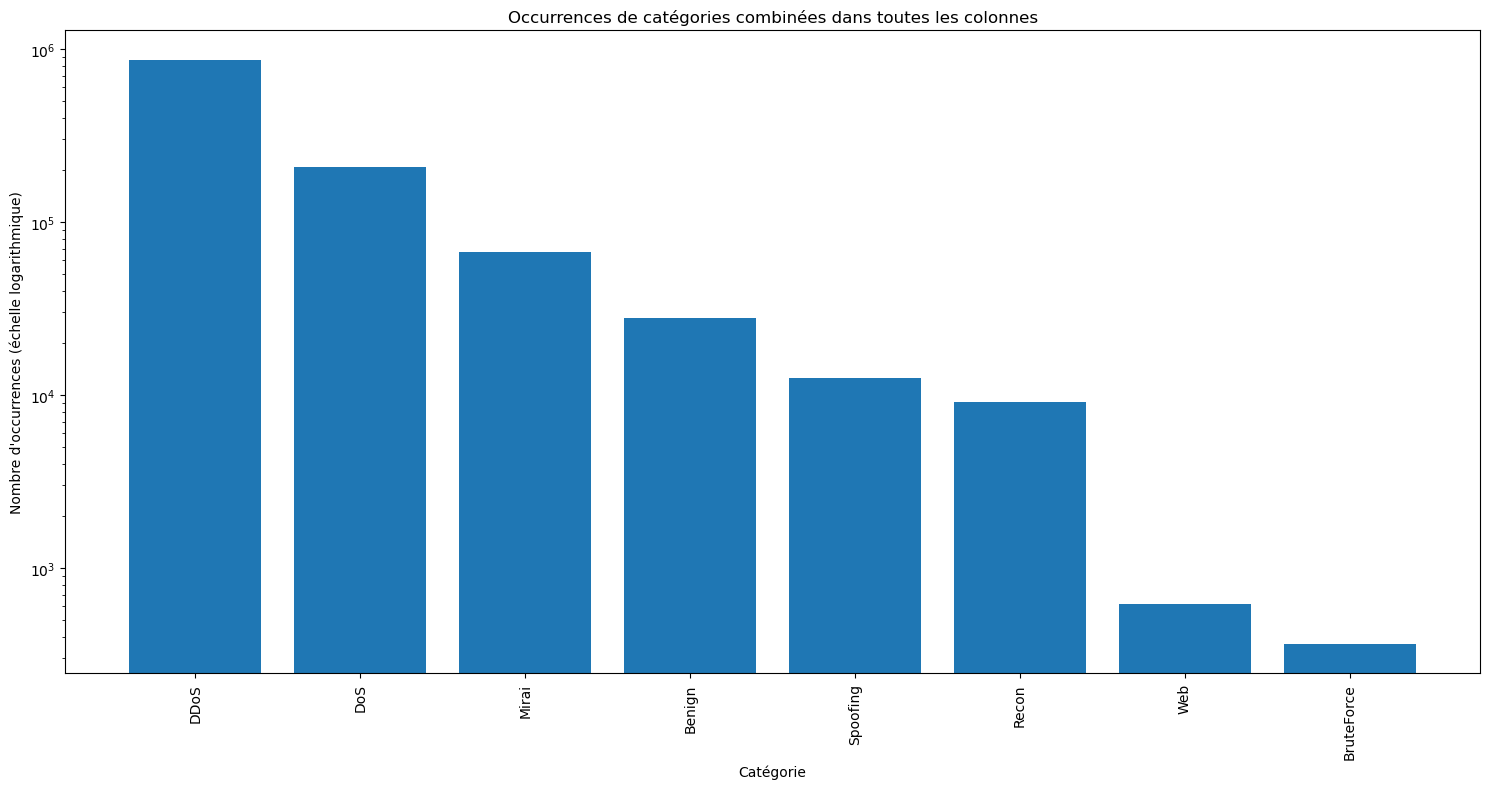

In [35]:
# Define total counts variable
total_categorie_counts_34 = []
total_categorie_counts_8 = []

# Column selection
categorie_colonne = 'label'

# Define
def plot_attacks_occurence(combined_counts, log_scale=True):
    plt.figure(figsize=(15, 8))

    # Utilisez le map pour attribuer des couleurs en fonction de la colonne '8_classes_label'
    # colors = df['8_classes_label'].map({'DDoS': 'red', 'DoS': 'blue', 'Mirai': 'green', 'Recon': 'purple', 'Spoofing': 'orange', 'Benign': 'gray', 'Web': 'pink', 'BruteForce': 'brown'})
    
    plt.bar(combined_counts.index, combined_counts.values)
    if log_scale:
        plt.yscale('log')  # Utilisez une échelle logarithmique sur l'axe des y
    plt.xlabel('Catégorie')
    if log_scale:
        plt.ylabel('Nombre d\'occurrences (échelle logarithmique)')
    else:
        plt.ylabel('Nombre d\'occurrences (échelle non logarithmique)')
    plt.title(f'Occurrences de catégories combinées dans toutes les colonnes')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Visualize dataset
for dataset_name in tqdm(datasets[:5]):
    if dataset_name.endswith(".csv"):
        # print(dataset_name)
        df = load_dataset(dataset_name)

        # Créez une nouvelle colonne en utilisant le dictionnaire dict_7classes
        df['8_classes_label'] = df['label'].map(dict_7classes)

        # Comptez le nombre d'occurrences de chaque catégorie dans ce fichier
        categorie_counts_34 = df[categorie_colonne].value_counts()
        categorie_counts_8 = df['8_classes_label'].value_counts()
        
        # Ajoutez ces comptages à la liste des totaux
        total_categorie_counts_34.append(categorie_counts_34)
        total_categorie_counts_8.append(categorie_counts_8)
        
        del df
        gc.collect()

# Plot total attacks occurence
combined_counts_34 = pd.concat(total_categorie_counts_34).groupby(level=0).sum()
combined_counts_34 = combined_counts_34.sort_values(ascending=False)

combined_counts_8 = pd.concat(total_categorie_counts_8).groupby(level=0).sum()
combined_counts_8 = combined_counts_8.sort_values(ascending=False)

plot_attacks_occurence(combined_counts_34, False)
plot_attacks_occurence(combined_counts_34)
plot_attacks_occurence(combined_counts_8, False)
plot_attacks_occurence(combined_counts_8)

# Pre-processing test

In [2]:
# Import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm
import pandas as pd
from scipy.stats import spearmanr

DATASET_DIRECTORY = ".\Files\\"

df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
# print(df_sets[0:10])

# Only use the first 10 datasets
# df_sets = df_sets[0:10]

training_sets = df_sets[:int(len(df_sets)*.8)]
test_sets = df_sets[int(len(df_sets)*.8):]

X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight', 
]
y_column = 'label'

scaler = StandardScaler()

for train_set in tqdm(training_sets):
    scaler.fit(pd.read_csv(DATASET_DIRECTORY + train_set)[X_columns])

100%|██████████| 135/135 [02:13<00:00,  1.01it/s]


In [3]:
def get_train_data(train_set):
    df = pd.read_csv(DATASET_DIRECTORY + train_set)
    X = df[X_columns]
    y = df[y_column]
    return X, y

def scale_data(X):
    return pd.DataFrame(scaler.transform(X))

def encode_labels(y, encoder=LabelEncoder()):
    y_encoded = encoder.fit_transform(y)
    return y_encoded, encoder

## SMOTE

In [10]:
X_train, y_train = get_train_data(training_sets[0])

# Scale the train set
X_train = scale_data(X_train)
y_train_encoded = encode_labels(y_train, encoder=LabelEncoder())

# Use SMOTE to balance the dataset
smote = SMOTE(random_state=42)

print(pd.Series(y_train_encoded).value_counts())

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

print(pd.Series(y_train_resampled).value_counts())

6     36554
14    27626
13    23149
8     21210
10    20739
9     20669
12    18189
21    16957
20    13630
19    10275
1      5600
23     5016
25     4661
24     3758
7      2377
22     1614
4      1505
15     1484
16      925
26      697
27      517
29      430
18      414
32      210
5       169
11      106
17       63
30       31
2        30
3        28
0        22
33       18
31        8
28        6
dtype: int64
9     36554
3     36554
16    36554
15    36554
27    36554
33    36554
5     36554
26    36554
32    36554
20    36554
11    36554
0     36554
2     36554
17    36554
30    36554
28    36554
29    36554
7     36554
18    36554
24    36554
4     36554
22    36554
1     36554
14    36554
13    36554
8     36554
10    36554
25    36554
12    36554
23    36554
19    36554
21    36554
6     36554
31    36554
dtype: int64


## Select features

### 1 - RFE

##### First time

In [55]:
# results = pd.DataFrame(columns=['Number of features', 'Accuracy', 'Recall', 'Precision', 'F1'])
# results.to_csv('.\\Results\\select_features_RFE.csv')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, y_train = get_train_data(training_sets[0])
X_train = scale_data(X_train)
y_train_encoded, encoder = encode_labels(y_train, encoder=LabelEncoder())

model = RandomForestClassifier(random_state=42)

for i in tqdm(range(6, len(pd.DataFrame(X_train, columns=X_columns).columns))):
    # print(f"Training model with {i} features")

    results = pd.read_csv('.\\Results\\select_features_RFE.csv', index_col=0)

    # Initialise RFE avec le modèle et le nombre de caractéristiques à sélectionner.
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_train, y_train_encoded)

    # Les caractéristiques sélectionnées sont stockées dans rfe.support_
    X_train = pd.DataFrame(X_train, columns=X_columns)
    # print(X_train.columns[rfe.support_])
    selected_features = X_train.columns[rfe.support_]

    X_test, y_test = get_train_data(training_sets[1])
    X_test = scale_data(X_test)
    y_test_encoded, encoder = encode_labels(y_test, encoder)

    # Maintenant, X_train et X_test ne contiendront que les caractéristiques sélectionnées.
    X_test = pd.DataFrame(X_test, columns=X_columns)
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Entraîne votre modèle sur les caractéristiques sélectionnées.
    model.fit(X_train_selected, y_train_encoded)

    # Faites des prédictions sur l'ensemble de test.
    y_pred = model.predict(X_test_selected)

    # Évalue les performances du modèle avec les caractéristiques sélectionnées.
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    accuracy, recall, precision, f1 = accuracy_score(y_test_encoded, y_pred), recall_score(y_test_encoded, y_pred, average='macro'), precision_score(y_test_encoded, y_pred, average='macro'), f1_score(y_test_encoded, y_pred, average='macro')
    results.loc[len(results)] = [i, accuracy, recall, precision, f1]
    # print(f"With {i} feature(s) :\n Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, F1: {f1:.2f}")

    # Save results
    results.sort_values(by=['Accuracy', 'Recall', 'Precision', 'F1'], ascending=False).to_csv('.\\Results\\select_features_RFE.csv')


In [4]:
pd.read_csv('.\\Results\\select_features_RFE.csv').sort_values(by=['Accuracy', 'Recall', 'Precision', 'F1'], ascending=False).head(20)

,Unnamed: 0,Number of features,Accuracy,Recall,Precision,F1
0,15,16.0,0.992642,0.713171,0.824036,0.724324
1,35,36.0,0.992619,0.712625,0.790833,0.723401
2,16,17.0,0.992537,0.715397,0.796229,0.727667
3,36,37.0,0.992454,0.711174,0.810508,0.721682
4,18,19.0,0.992331,0.712621,0.802231,0.724874
5,31,32.0,0.992313,0.707520,0.793911,0.716507
6,19,20.0,0.992308,0.707986,0.793707,0.718281
7,17,18.0,0.992295,0.709925,0.819228,0.722424
8,33,34.0,0.992295,0.708340,0.795253,0.718227
9,25,26.0,0.992281,0.708628,0.784567,0.719058


### 2 - Based on model

In [5]:
from sklearn.ensemble import RandomForestClassifier

X_train, y_train = get_train_data(training_sets[0])
X_train = scale_data(X_train)
# print(X_train[:5])
y_train_encoded, encoder = encode_labels(y_train, encoder=LabelEncoder())

# Étape 1 : Entraînement du modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_encoded)

# Étape 2 : Extraction de l'importance des fonctionnalités
feature_importances = model.feature_importances_

# Création d'un DataFrame avec les noms des fonctionnalités et leurs importances
feature_importance_df = pd.DataFrame({
    'Fonctionnalité': X_train.columns,
    'Importance': feature_importances,
})
# Récupérez les numéros de colonnes à partir de 'Fonctionnalité' (par exemple, 0, 1, 2, ...)
column_numbers = feature_importance_df['Fonctionnalité'].astype(int)

# Sélectionnez les noms des colonnes correspondantes dans X_columns
selected_column_names = [X_columns[i] for i in column_numbers]

# Remplacez les numéros par les noms des colonnes dans 'Nom des Colonnes'
feature_importance_df['Nom des Colonnes'] = selected_column_names
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Save results
feature_importance_df.to_csv('.\\Results\\select_features_Based_on_model.csv')

# Affichage des fonctionnalités avec leurs importances
print("Importance des fonctionnalités :")
print(feature_importance_df['Importance'].mean())
print(feature_importance_df.head(46))

# Étape 3 : Sélection des fonctionnalités importantes
threshold = 0.021739130434782608  # Seuil d'importance
important_feature_indices = feature_importances > threshold
important_feature_names = X_train.columns[important_feature_indices]

# Étape 4 : Sélection des colonnes du DataFrame
X_train_selected = X_train[important_feature_names]

# # Affichage des fonctionnalités sélectionnées
# print("Fonctionnalités sélectionnées :")
# print(important_feature_names)

Importance des fonctionnalités :
0.021739130434782608
    Fonctionnalité  Importance Nom des Colonnes
39              39    0.244235              IAT
41              41    0.053011         Magnitue
15              15    0.050187        syn_count
2                2    0.046410    Protocol Type
36              36    0.042443              AVG
8                8    0.041537  syn_flag_number
38              38    0.040882         Tot size
1                1    0.039261    Header_Length
34              34    0.038285              Min
33              33    0.035171          Tot sum
10              10    0.034517  psh_flag_number
7                7    0.032522  fin_flag_number
0                0    0.028998    flow_duration
35              35    0.028952              Max
14              14    0.026846        ack_count
16              16    0.023364        fin_count
27              27    0.022786              UDP
18              18    0.022618        rst_count
17              17    0.021963    